# Introduction into System Dynamics using Python

System dynamics is a method devoted to the study of systems, and is thus a tool within the Systems Thinking tool kit. It uses simple graphical notations to model systems such as stock and flow diagrams. These diagrams contain specific components and symbols to describe systems. This tutorial gives an introduction to the elemens of stock and flow diagram using the BPTK-Py framework.

The tutorial explains system dynamics with a population model. The model shows how the population changes overtime and which factors influence the population value.

![Image](./images/population.png)

Let's create the model first. It contains all stocks and flows. The model runs for 10 years (starttime = 0, stoptime = 10) and we want to analyse the results after each year (dt = 1). In the next steps we are going to add the stocks and flows to the model.

## Prerequisite: Install BPTK PY

Please run the following line to obtain the most recent version of BPTK Py!

In [ ]:
pip install -U BPTK_Py

In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd
model = Model(starttime=0.0,stoptime=10.0,dt=1.0,name='Population')

**Stocks.** A stock represents a part of a system whose value at any given instant in time depends on the systems past behavior. The value of the stocks at a particular instant in time cannot simply be determined by measuring the value of the other parts of the system at that instant in time – the only way you can calculate it is by measuring how it changes at every instant and adding up all these changes.

![Image](./images/stock_population.png)

The stock in our model is population. Assume that we have 80 mio. people today. These people are our stock. We want to know how the population changes in the next ten years. We define a stock in Python with `stock`. The name of the stock is "population".


In [2]:
population = model.stock("population")
population.initial_value = 80000000.0

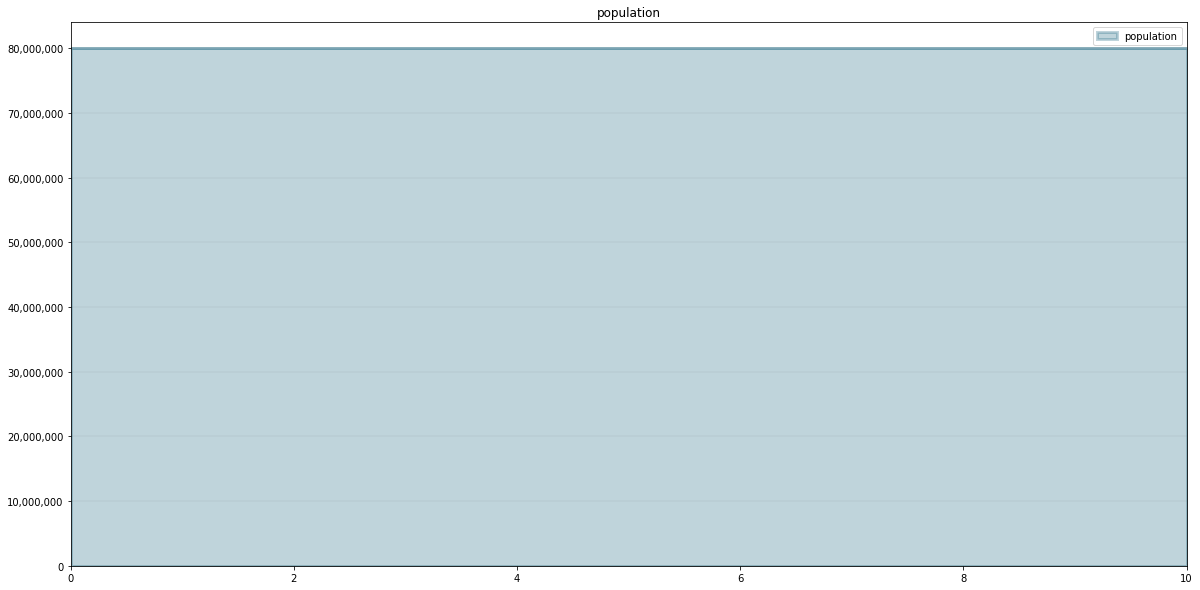

In [3]:
population.plot()

The population does not change. There are no other factors which influence the number of people. However, this is not how we measure population. Usually, we also have births and deaths. We add these information by using flows.

**Flows.** Flows represent the rate at which the stock is changing at any given instant, they either flow into a stock (causing it to increase) or flow out of a stock (causing it to decrease).

![Image](./images/flow_births.png) ![Image](./images/flow_deaths.png)

We continue our example and say that every year 1.000.000 babies are born and 2.000.000 people die. The flows are defined by using the method `flow`.

In [4]:
births = model.flow("births")
deaths = model.flow("deaths")
births.equation = 1000000.0
deaths.equation = 2000000.0

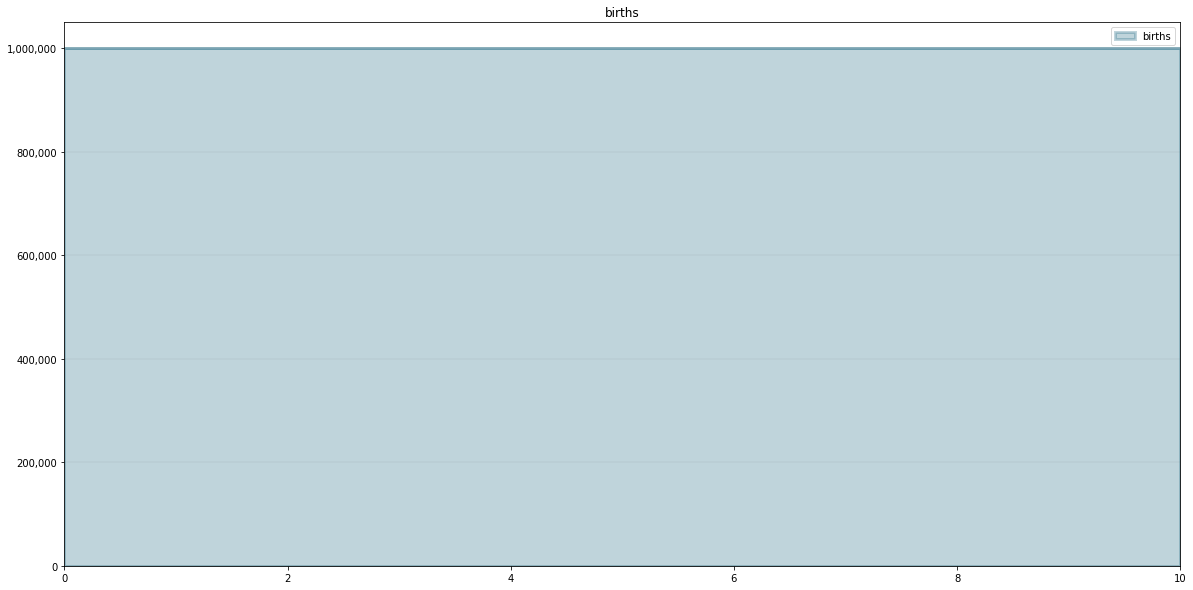

In [5]:
births.plot()

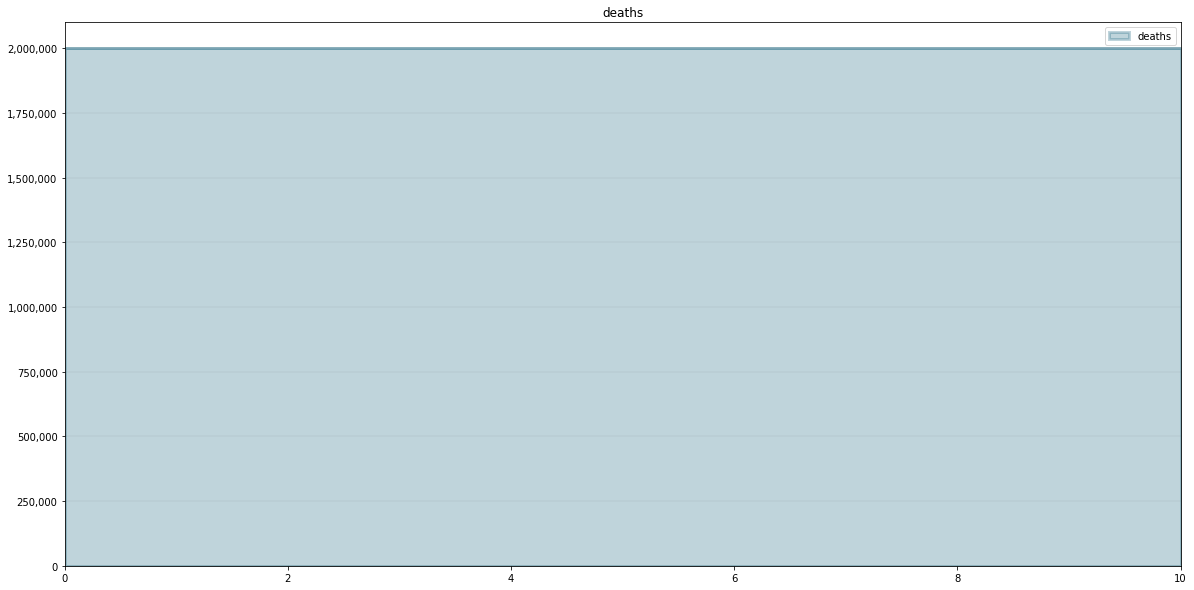

In [18]:
deaths.plot()

We combine the flows with our stock by using equations.

![Image](./images/stock_flow_population.png)

We set the equation of population with births and deaths. Births flows into the population and deaths flow out of the population.

In [6]:
population.equation = births - deaths

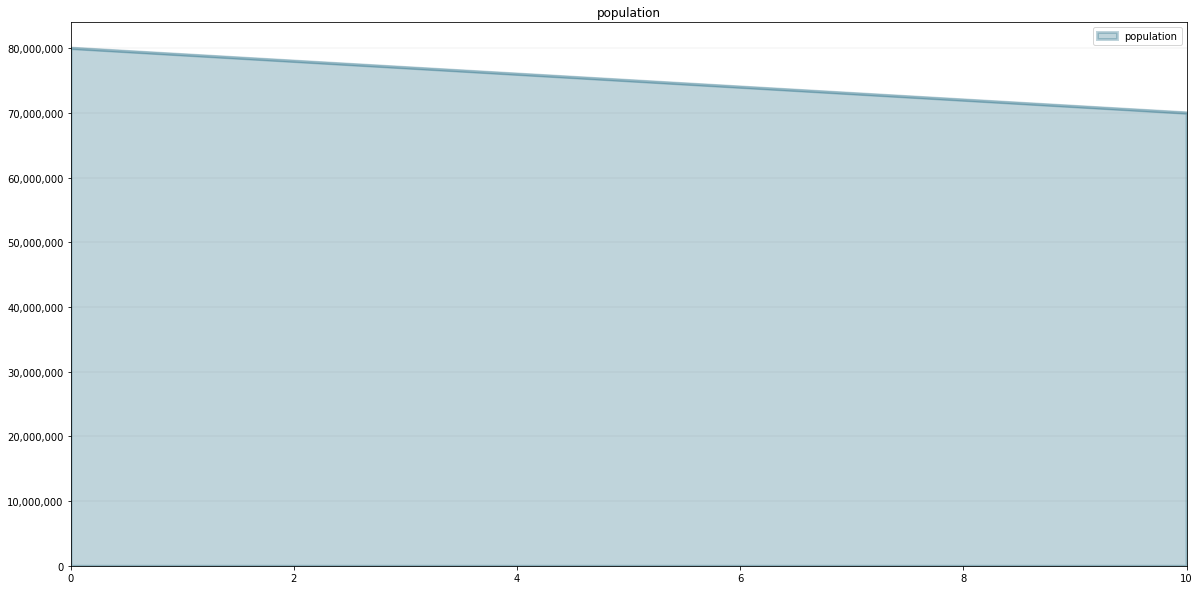

In [7]:
population.plot()

In reality, the number of births or deaths is not fixed. Therefore, it is better to use relative values. They change depending on the population. Furthermore, the flows are also determined by outside circumstances. All these values are called converters. 

**Converters.** Converters either represent parts at the boundary of the system (i.e. parts whose value is not determined by the behaviour of the system itself) or they represent parts of a system whose value can be derived from other parts of the system at any time through some computational procedure.

![Image](./images/population.png)

In the image above, the converters are circles. In Python, we define converters with `converter` or `constant`. `constant`is just a converter with a constant value. 

In [8]:
birthRate = model.converter("birthrate")
deathRate = model.converter("deathrate")
foodAvailablePerPerson = model.converter("foodavailableperperson")
foodAvailable = model.constant("foodavailable")

The connectors of the model are defined by `equation`.

**Connectors.** Much like in causal loop diagrams the connectors of a system show how the parts of a system influence each other.  Stocks can only be influenced by flows (i.e. there can be no connector that connects into a stock), flows can be influenced by stocks, other flows, and by converters. Converters either are not influenced at all (i.e. they are at the systems boundary) or are influenced by stocks, flows and other converters.

Since `foodAvailable` is a constant, we can initiliaze it with a float value.

In [9]:
foodAvailable.equation = 80000000.0

The converters `foodAvailablePerPerson` and `birthRate` are formulas. `foodAvailablePerPerson` depends on `population` and `foodAvailable`. The more people the less food per person. The birth rate decreases if we have less than one unit food per person.

In [10]:
foodAvailablePerPerson.equation = population/foodAvailable
birthRate.equation = 0.01*foodAvailablePerPerson

We define the death rate in our model using a non-linear relationship (depending on food available per person). We capture this relationship in a lookup table that we store in the `points` property of the model (using a Python list).

In [11]:
model.points["deathrate"] = [
    [0.0,1.0],
    [0.1,0.670320046036],
    [0.2,0.449328964117],
    [0.3,0.301194211912],
    [0.4,0.201896517995],
    [0.5,0.135335283237],
    [0.6,0.0907179532894],
    [0.7,0.0608100626252],
    [0.8,0.0407622039784],
    [0.9,0.0273237224473],
    [1.0,0.0183156388887]
]

We can easily plot the lookup table to see whether it has the right shape:

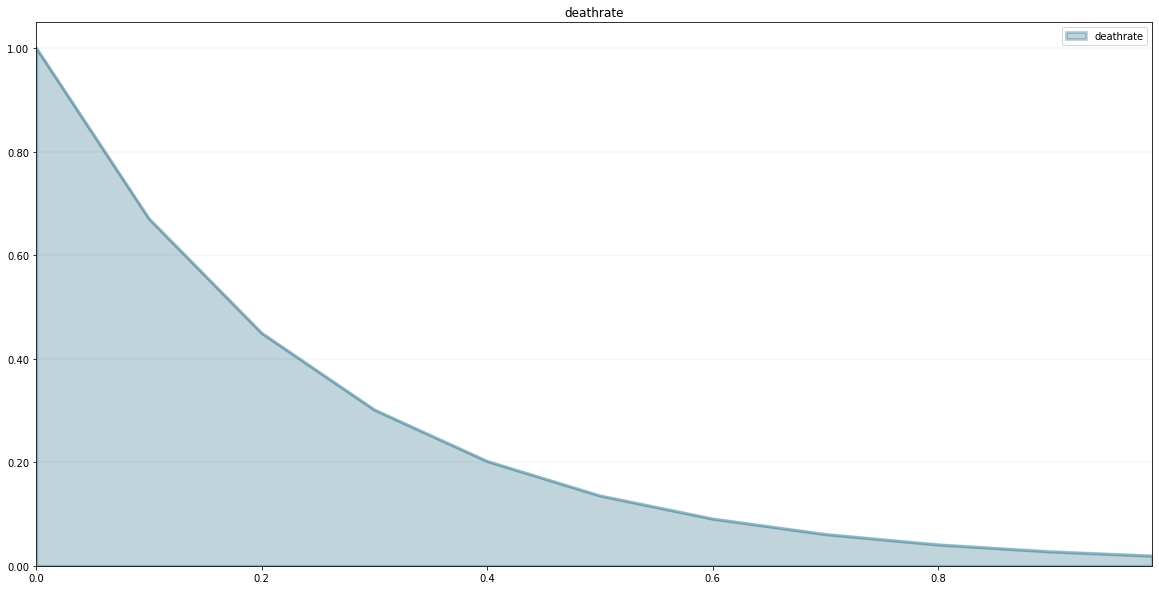

In [12]:
model.plot_lookup("deathrate")

Now, we have defined all components. Let us plot them. We first register the model.

In [13]:
import BPTK_Py
bptk = BPTK_Py.bptk()
bptk.register_model(model)

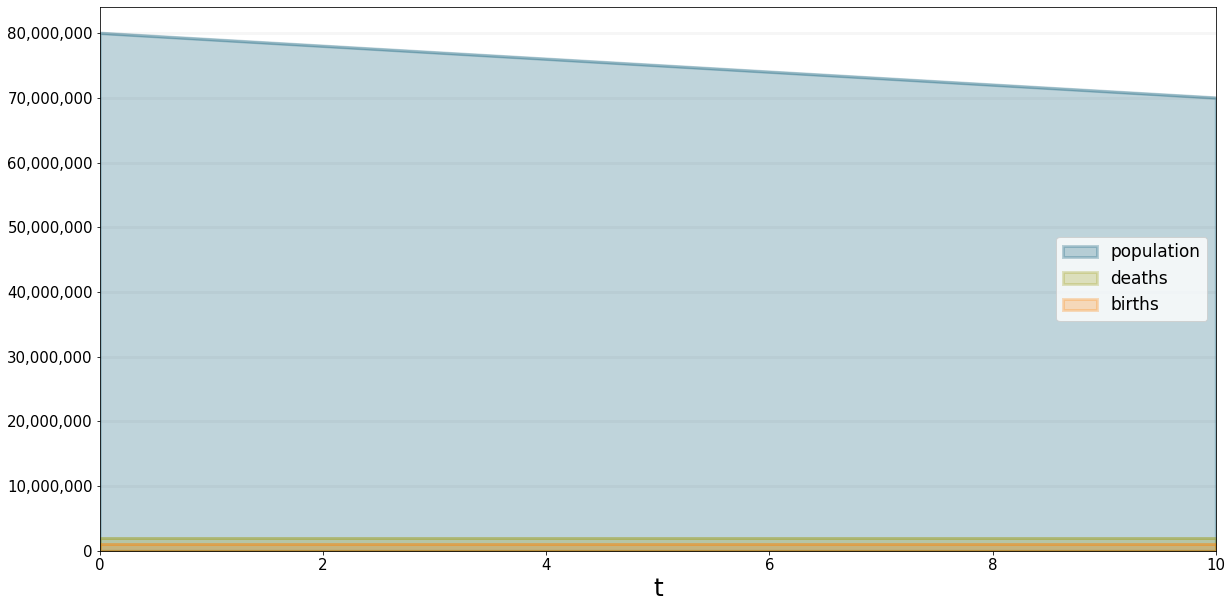

In [19]:
bptk.plot_scenarios(
    scenarios="base",
    scenario_managers="smPopulation",
    equations=["population","deaths","births"])